In [1]:
library(data.table)

In [2]:
library(ggplot2)

In [3]:
#library(dplyr)

In [4]:
#options(scipen=999)

# Time difference between edits for human edits (using gradient boosting)

In [5]:
anonymous_inter_edit <- data.table(read.table("../../python_analysis_scripts/data_edit_analyses/used_for_model_iteration_1/ANONYMOUS_USERS_inter_edit.tsv", header=TRUE, sep="\t"))

In [6]:
summary(anonymous_inter_edit)

                                 username       session_start      
 2003:66:8F3A:1F66:222:4DFF:FEAF:FA63:  21364   Min.   :2.012e+13  
 114.183.56.228                      :  15737   1st Qu.:2.014e+13  
 10.68.17.174                        :  14642   Median :2.015e+13  
 2003:66:8F3D:E785:222:4DFF:FEAF:FA63:  12451   Mean   :2.015e+13  
 130.88.141.34                       :   8693   3rd Qu.:2.016e+13  
 76.20.25.243                        :   8397   Max.   :2.017e+13  
 (Other)                             :1247009                      
   inter_edit    
 Min.   :   0.0  
 1st Qu.:  10.0  
 Median :  28.0  
 Mean   : 155.4  
 3rd Qu.:  92.0  
 Max.   :3599.0  
                 

In [7]:
anonymous_edit_session_thresholds_gradient_boosting <- data.table(read.table("../../python_analysis_scripts/data_edit_analyses/used_for_model_iteration_2/gradient_boosting_threshold_scores_I2_for_anonymous_user_sessions.tsv", header=TRUE, sep="\t"))

In [8]:
summary(anonymous_edit_session_thresholds_gradient_boosting)

          username      session_start       mean_in_seconds   std_in_seconds   
 77.56.53.183 :   791   Min.   :2.012e+13   Min.   :   0.00   Min.   :   0.00  
 76.20.25.243 :   469   1st Qu.:2.014e+13   1st Qu.:  34.02   1st Qu.:  24.75  
 221.94.14.18 :   423   Median :2.015e+13   Median :  99.23   Median :  97.72  
 27.119.40.146:   379   Mean   :2.015e+13   Mean   : 312.73   Mean   : 287.43  
 92.249.181.99:   327   3rd Qu.:2.016e+13   3rd Qu.: 369.15   3rd Qu.: 390.37  
 78.66.239.141:   307   Max.   :2.017e+13   Max.   :3577.50   Max.   :2532.86  
 (Other)      :107592                                                          
 namespace_0_edits  namespace_1_edits  namespace_2_edits namespace_3_edits  
 Min.   :    0.00   Min.   :0.000000   Min.   : 0.0000   Min.   : 0.000000  
 1st Qu.:    3.00   1st Qu.:0.000000   1st Qu.: 0.0000   1st Qu.: 0.000000  
 Median :    4.00   Median :0.000000   Median : 0.0000   Median : 0.000000  
 Mean   :   12.97   Mean   :0.003518   Mean   : 0.00

In [9]:
anonymous_edit_session_thresholds_and_edits <- merge(anonymous_inter_edit,anonymous_edit_session_thresholds_gradient_boosting)

In [10]:
summary(anonymous_edit_session_thresholds_and_edits)

                                 username       session_start      
 2003:66:8F3A:1F66:222:4DFF:FEAF:FA63:  21364   Min.   :2.012e+13  
 114.183.56.228                      :  15737   1st Qu.:2.014e+13  
 10.68.17.174                        :  14642   Median :2.015e+13  
 2003:66:8F3D:E785:222:4DFF:FEAF:FA63:  12451   Mean   :2.015e+13  
 130.88.141.34                       :   8693   3rd Qu.:2.016e+13  
 76.20.25.243                        :   8397   Max.   :2.017e+13  
 (Other)                             :1247009                      
   inter_edit     mean_in_seconds   std_in_seconds    namespace_0_edits
 Min.   :   0.0   Min.   :   0.00   Min.   :   0.00   Min.   :    0.0  
 1st Qu.:  10.0   1st Qu.:  31.51   1st Qu.:  49.22   1st Qu.:   11.0  
 Median :  28.0   Median :  59.83   Median : 101.19   Median :   54.0  
 Mean   : 155.4   Mean   : 155.39   Mean   : 205.81   Mean   :  964.6  
 3rd Qu.:  92.0   3rd Qu.: 138.95   3rd Qu.: 251.25   3rd Qu.:  357.0  
 Max.   :3599.0   Max.  

In [11]:
anonymous_edit_session_thresholds_and_edits$log_session_length_in_seconds <- 
    log10(anonymous_edit_session_thresholds_and_edits$session_length_in_seconds + 1)

In [12]:
anonymous_edit_session_thresholds_and_edits$log_inter_edit <- 
    log10(anonymous_edit_session_thresholds_and_edits$inter_edit + 1)

In [13]:
anonymous_edit_session_thresholds_and_edits$log_mean_in_seconds <- 
    log10(anonymous_edit_session_thresholds_and_edits$mean_in_seconds + 1)

In [14]:
# nrow(anonymous_edit_session_predictions_and_edits[bot_prediction == 1])

In [15]:
# nrow(anonymous_edit_session_predictions_and_edits[bot_prediction == 0])

In [16]:
anonymous_edit_session_thresholds_and_edits_recall_point_one_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 4.46,]
anonymous_edit_session_thresholds_and_edits_recall_10_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 5.46,]
anonymous_edit_session_thresholds_and_edits_recall_20_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 4.01,]
anonymous_edit_session_thresholds_and_edits_recall_30_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 3.01,]
anonymous_edit_session_thresholds_and_edits_recall_40_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 2.21,]
anonymous_edit_session_thresholds_and_edits_recall_50_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < 1.41,]
anonymous_edit_session_thresholds_and_edits_recall_60_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < .66,]
anonymous_edit_session_thresholds_and_edits_recall_70_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < -.18,]
anonymous_edit_session_thresholds_and_edits_recall_80_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < -1.18,]
anonymous_edit_session_thresholds_and_edits_recall_90_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < -2.39,]
anonymous_edit_session_thresholds_and_edits_recall_100_percent = anonymous_edit_session_thresholds_and_edits[threshold_score < -5.25,]

In [17]:
nrow(anonymous_edit_session_thresholds_and_edits)
nrow(anonymous_edit_session_thresholds_and_edits_recall_point_one_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_10_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_20_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_30_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_40_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_50_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_60_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_70_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_80_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_90_percent)
nrow(anonymous_edit_session_thresholds_and_edits_recall_100_percent)

[1] 1328293

[1] 1291625

[1] 1302935

[1] 1288208

[1] 1282466

[1] 1278793

[1] 1271747

[1] 1243113

[1] 1202787

[1] 1163233

[1] 1067335

[1] 859794

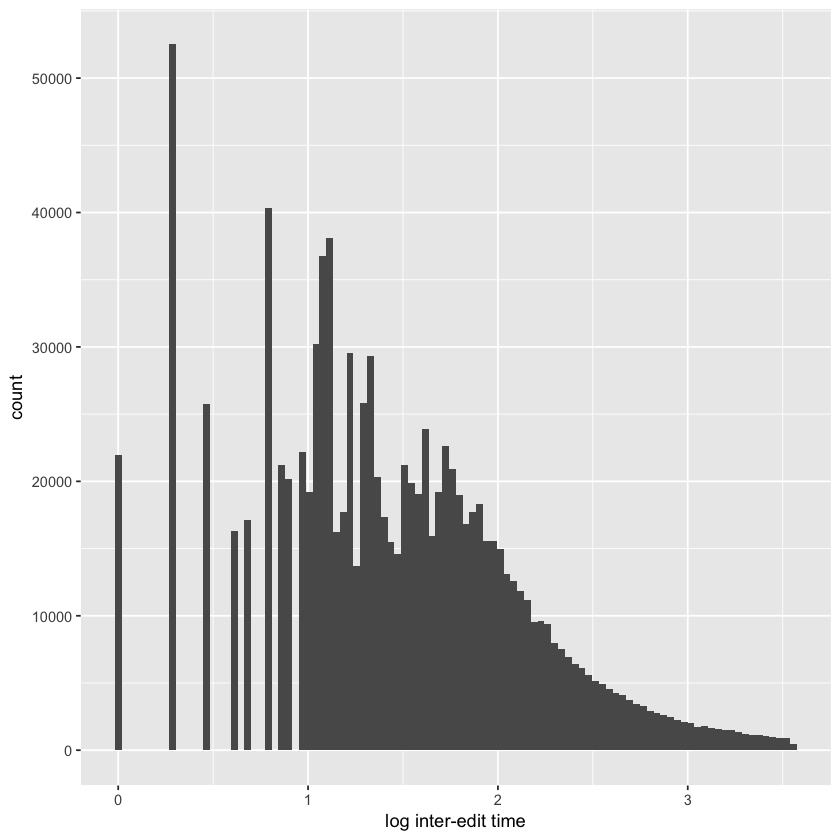

In [18]:
ggplot(anonymous_edit_session_thresholds_and_edits[anonymous_edit_session_thresholds_and_edits$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

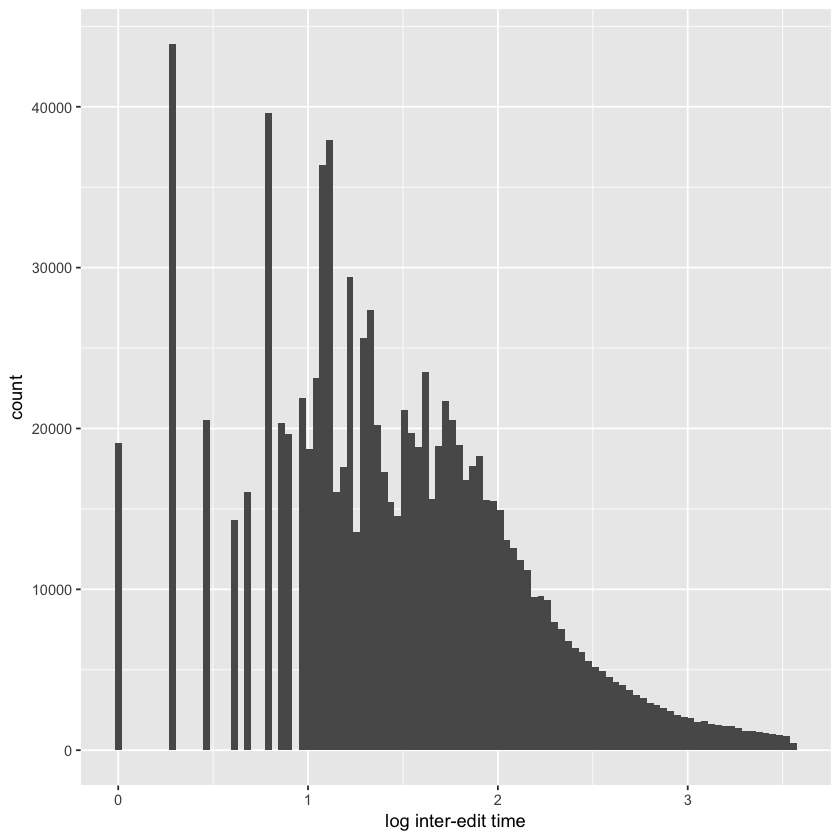

In [19]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_point_one_percent[anonymous_edit_session_thresholds_and_edits_recall_point_one_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

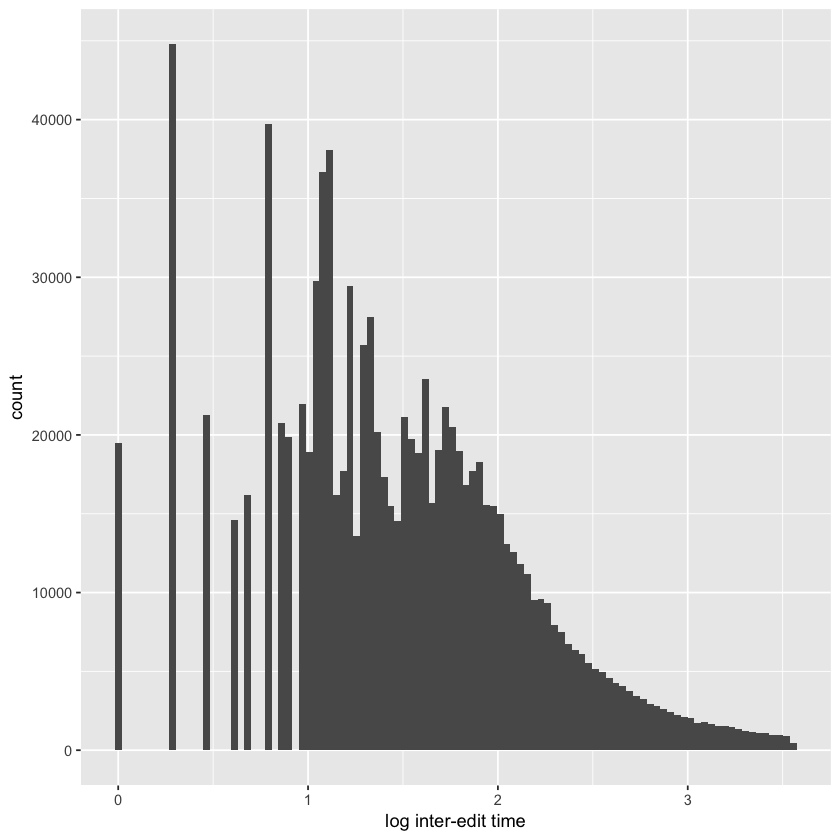

In [20]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_10_percent[anonymous_edit_session_thresholds_and_edits_recall_10_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

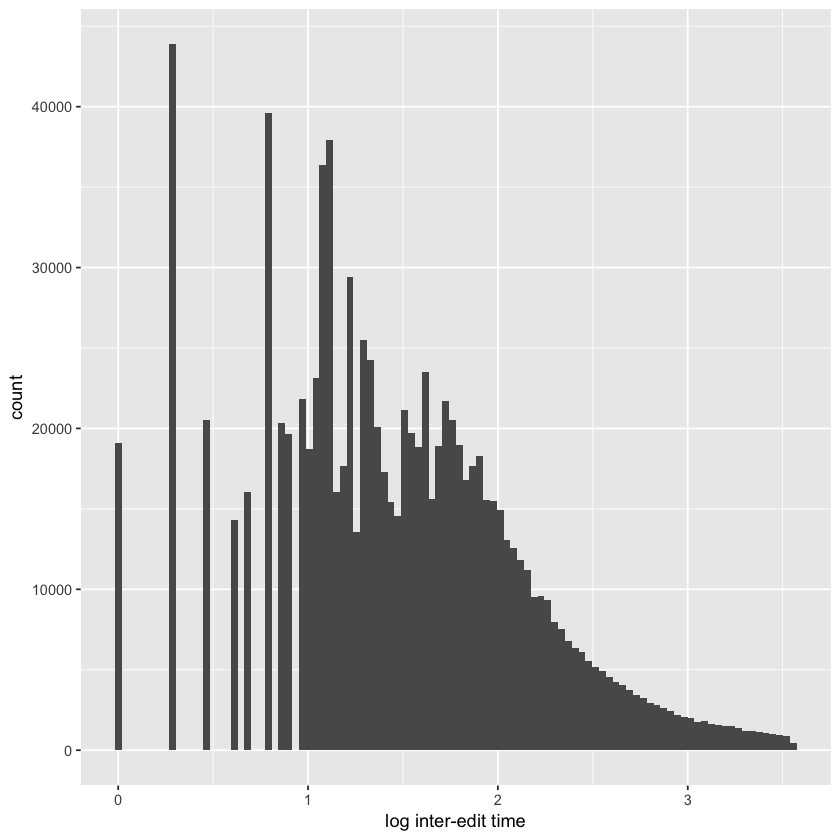

In [21]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_20_percent[anonymous_edit_session_thresholds_and_edits_recall_20_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

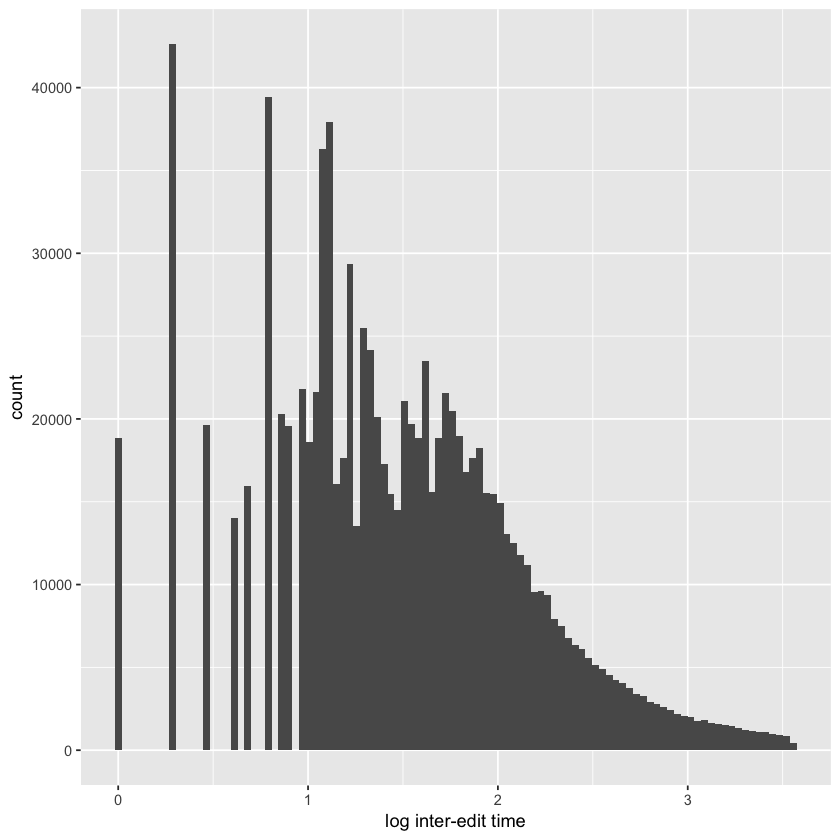

In [22]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_30_percent[anonymous_edit_session_thresholds_and_edits_recall_30_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

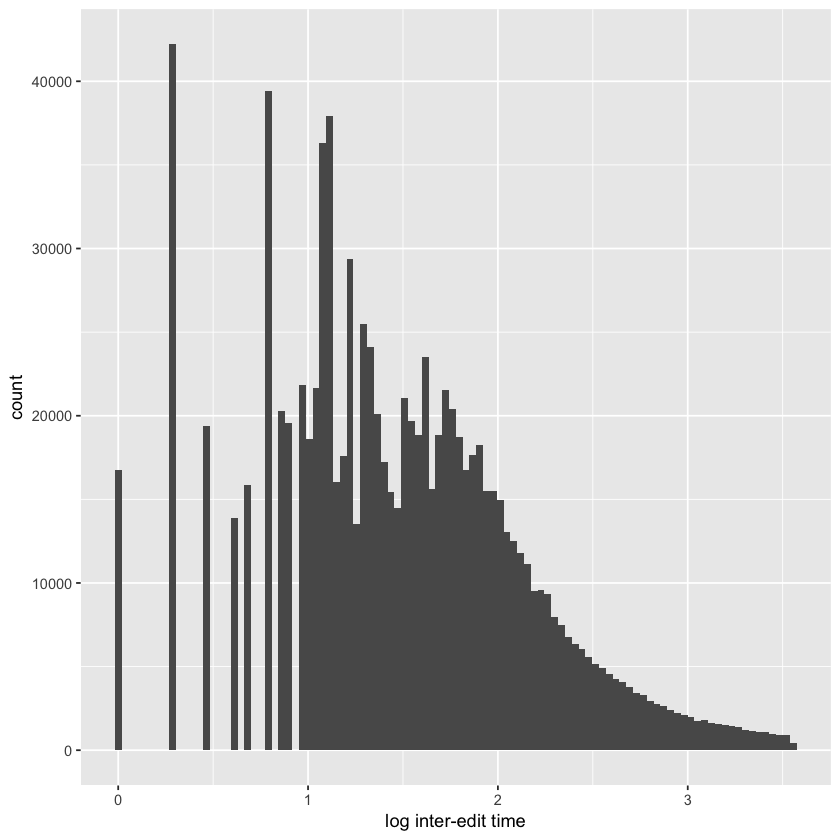

In [23]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_40_percent[anonymous_edit_session_thresholds_and_edits_recall_40_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

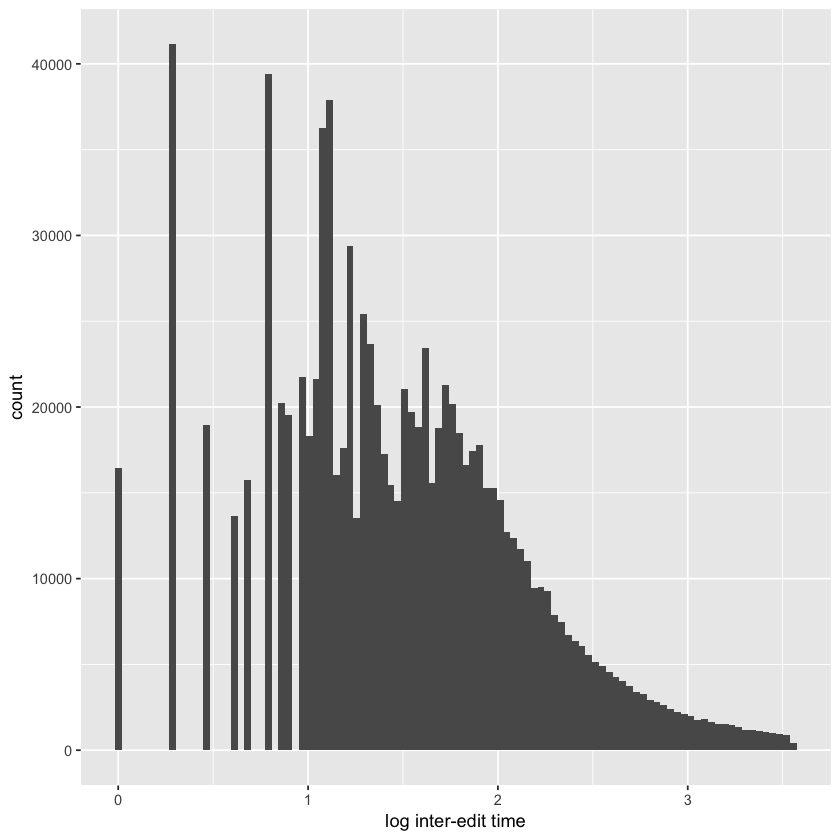

In [24]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_50_percent[anonymous_edit_session_thresholds_and_edits_recall_50_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

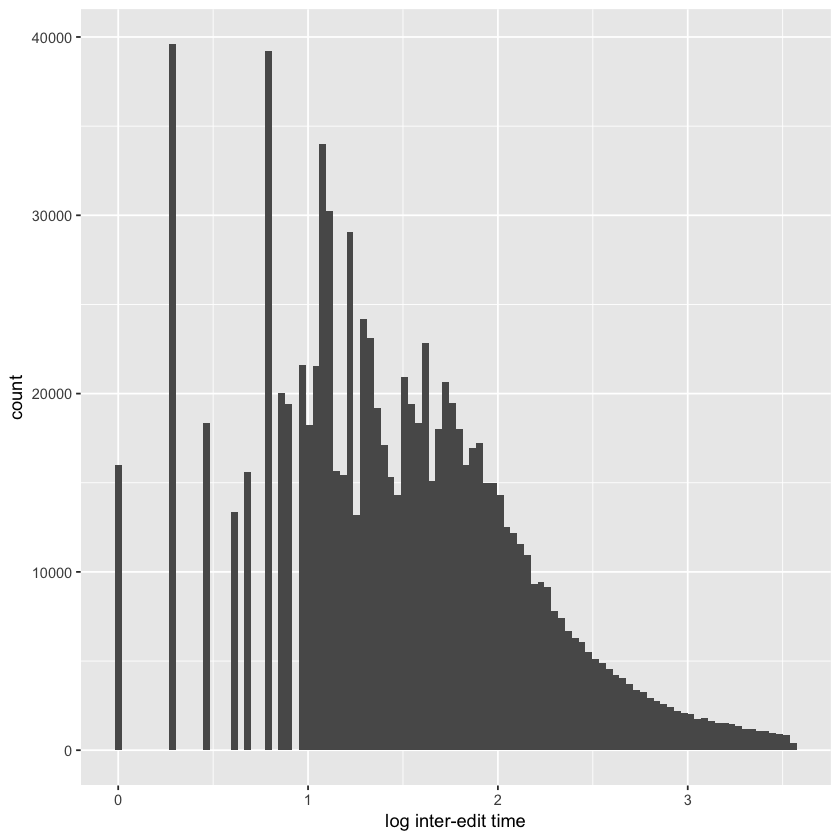

In [25]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_60_percent[anonymous_edit_session_thresholds_and_edits_recall_60_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

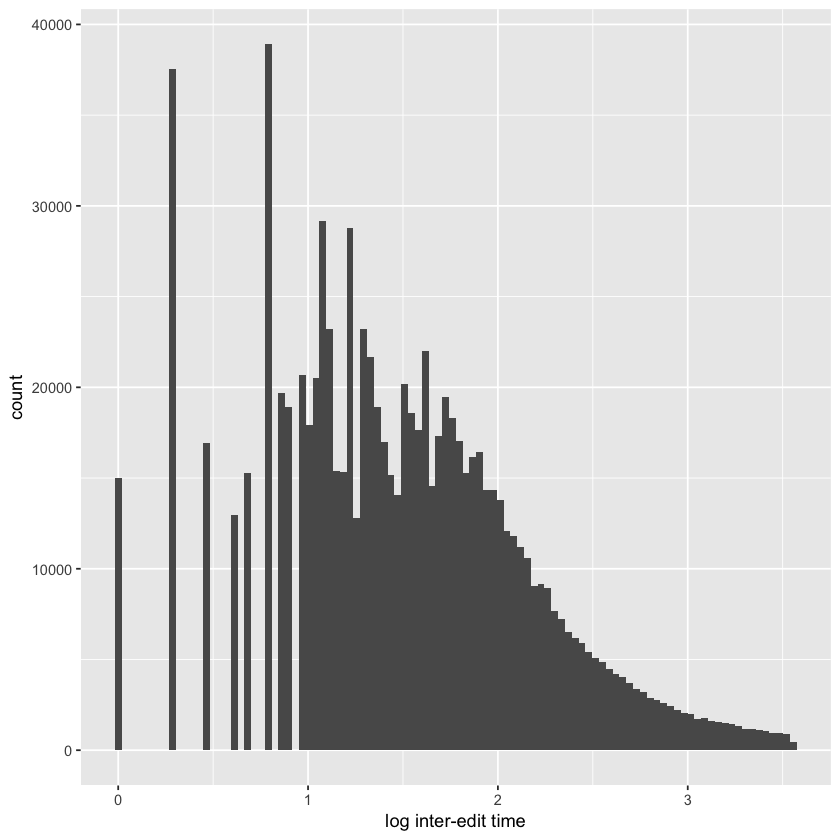

In [26]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_70_percent[anonymous_edit_session_thresholds_and_edits_recall_70_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

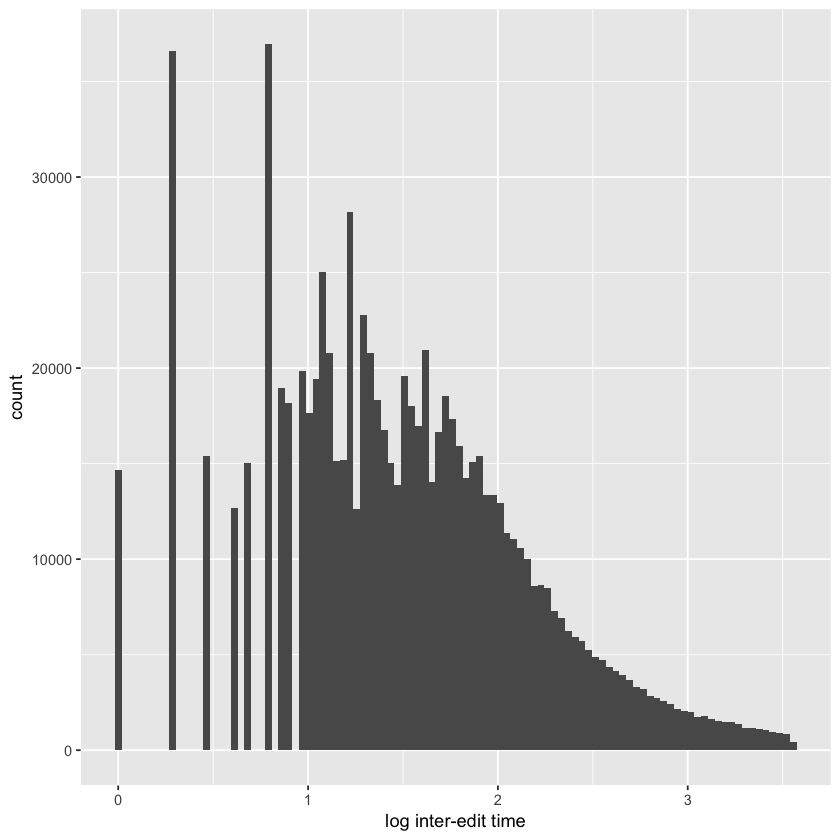

In [27]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_80_percent[anonymous_edit_session_thresholds_and_edits_recall_80_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

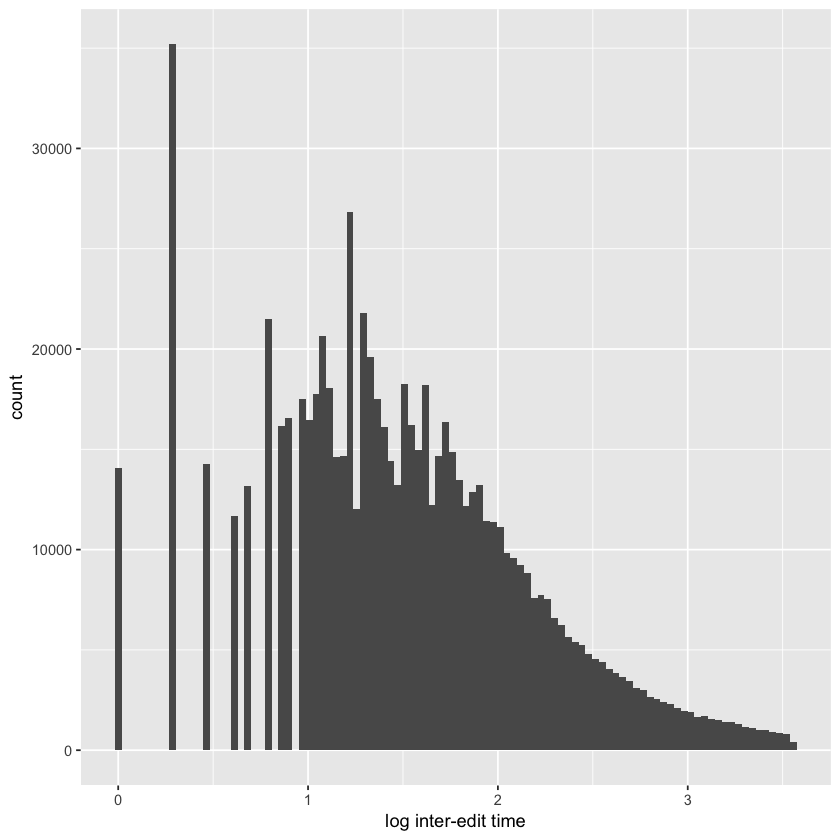

In [28]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_90_percent[anonymous_edit_session_thresholds_and_edits_recall_90_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

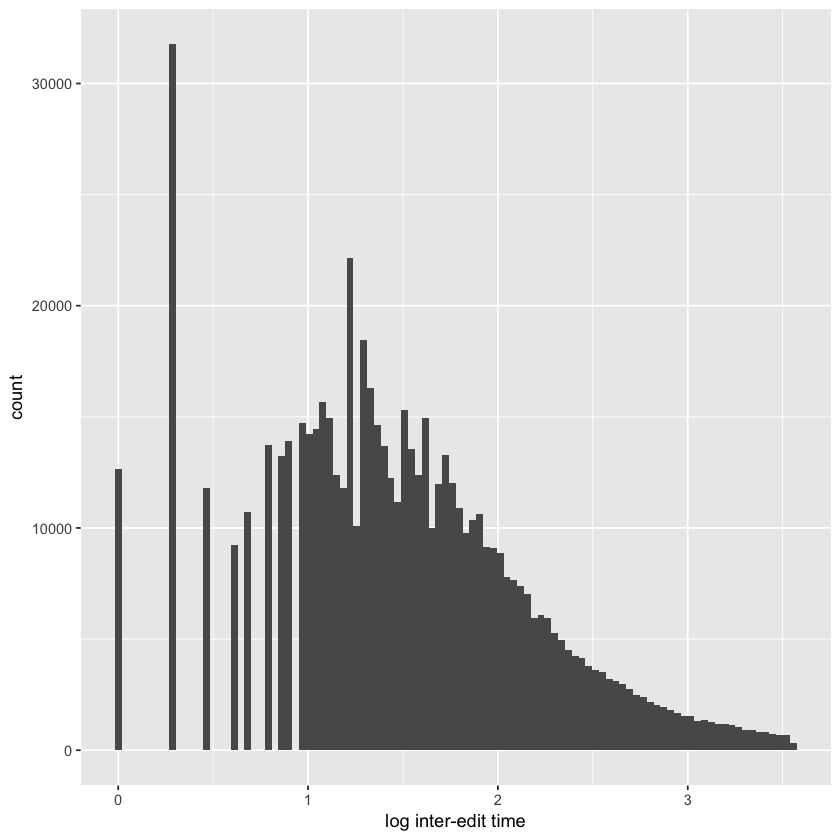

In [29]:
ggplot(anonymous_edit_session_thresholds_and_edits_recall_100_percent[anonymous_edit_session_thresholds_and_edits_recall_100_percent$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=100) + labs(x="log inter-edit time");

In [30]:
#OTHER STUFF NO LONGER USED

In [31]:
ggplot(anonymous_edit_session_predictions_and_edits[anonymous_edit_session_predictions_and_edits$bot_prediction == 0 &
                                                        anonymous_edit_session_predictions_and_edits$edits >= 10],
       aes(x=log_inter_edit)) +
geom_histogram(bins=50)

ERROR: Error in ggplot(anonymous_edit_session_predictions_and_edits[anonymous_edit_session_predictions_and_edits$bot_prediction == : object 'anonymous_edit_session_predictions_and_edits' not found


In [ ]:
ggplot(anonymous_edit_session_predictions_random_forest[anonymous_edit_session_predictions_random_forest$bot_prediction == 0 &
                                                        anonymous_edit_session_predictions_random_forest$edits >= 10],
       aes(x=log_mean_in_seconds)) +
geom_histogram(bins=100)

In [ ]:
nrow(anonymous_edit_session_predictions_and_edits[anonymous_edit_session_predictions_and_edits$bot_prediction == 0 &
                                             anonymous_edit_session_predictions_and_edits$edits >= 10 &
                                             anonymous_edit_session_predictions_and_edits$inter_edit < 10])

In [ ]:
anonymous_fast_sessions = anonymous_edit_session_predictions_random_forest[anonymous_edit_session_predictions_random_forest$bot_prediction == 0 &
                                             anonymous_edit_session_predictions_random_forest$edits >= 10 &
                                             anonymous_edit_session_predictions_random_forest$mean_in_seconds < 10]

In [ ]:
# summary(anonymous_fast_sessions)
head(anonymous_fast_sessions[order(-edits)], n=20)
# max(anonymous_fast_sessions$edits)

In [ ]:
anonymous_fast_revisions = anonymous_edit_session_predictions_and_edits[anonymous_edit_session_predictions_and_edits$bot_prediction == 0 &
                                             anonymous_edit_session_predictions_and_edits$edits >= 10 &
                                             anonymous_edit_session_predictions_and_edits$mean_in_seconds < 10]

In [ ]:
head(anonymous_fast_revisions[order(-edits)], n=1000)